In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [111]:
train='C:/anaconda3/envs/sig39/Corona_NLP_train.csv'
test='C:/anaconda3/envs/sig39/Corona_NLP_test.csv'

In [112]:
trainOriginal = pd.read_csv(train, encoding='latin-1')
testOriginal = pd.read_csv(test, encoding='latin-1')

In [4]:
train = trainOriginal.copy()
test = testOriginal.copy()

In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
train['Location'].value_counts()[:60]

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
New Delhi, India           138
Atlanta, GA                126
New York                   126
Mumbai, India              109
Worldwide                  101
Lagos, Nigeria              99
Houston, TX                 98
Austin, TX                  98
Texas, USA                  98
London, UK                  96
Toronto                     91
Los Angeles                 89
Nairobi,

In [10]:
train['Location'] = train['Location'].str.split(",").str[0]
test['Location'] = test['Location'].str.split(",").str[0]

In [11]:
train['Location'].value_counts()[:60]

London            1247
New York           709
United States      530
Washington         504
Los Angeles        402
Toronto            346
United Kingdom     342
India              276
Chicago            262
England            255
UK                 246
USA                231
Australia          230
California         211
San Francisco      206
Sydney             202
New Delhi          201
Melbourne          199
Canada             198
Mumbai             197
Boston             197
Atlanta            165
Global             159
Houston            156
Texas              145
Lagos              136
Austin             130
Florida            121
Seattle            120
Nairobi            117
Dallas             115
Philadelphia       114
Manchester         111
Vancouver          106
Scotland           104
New Jersey         103
Worldwide          101
San Diego           99
New York City       95
Dubai               91
Singapore           88
South Africa        87
Portland            86
Denver     

In [12]:
train['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [13]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Twitted locations')

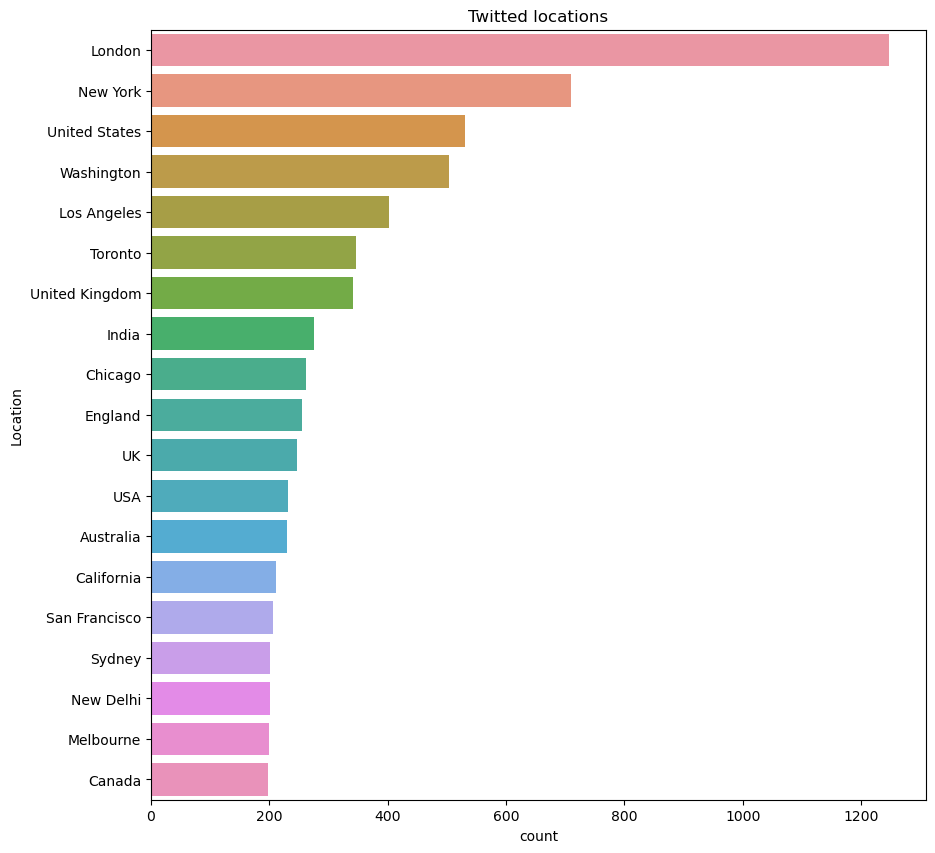

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[
    0:19].index).set_title("Twitted locations")

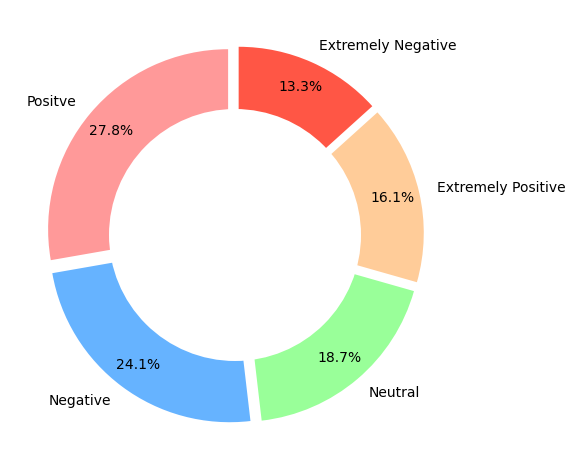

In [15]:
labels = ['Positve', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff5645']
explode = (0.05,0.05,0.05,0.05,0.05) 
plt.pie(train.Sentiment.value_counts(), colors = colors, labels=labels,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centreCircle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)
plt.tight_layout()
plt.show()

In [16]:
plotDf = train.iloc[:,[2,5]] #[:,[2,5]] is the location and sentiment columns
plotDf

,Location,Sentiment
0,London,Neutral
1,UK,Positive
2,Vagabonds,Positive
3,NaN,Positive
4,NaN,Extremely Negative
...,...,...
41152,Wellington City,Neutral
41153,NaN,Extremely Negative
41154,NaN,Positive
41155,NaN,Neutral


<Axes: title={'center': 'Sentiment Categories of the First 5 Top Locations'}, xlabel='Location', ylabel='count'>

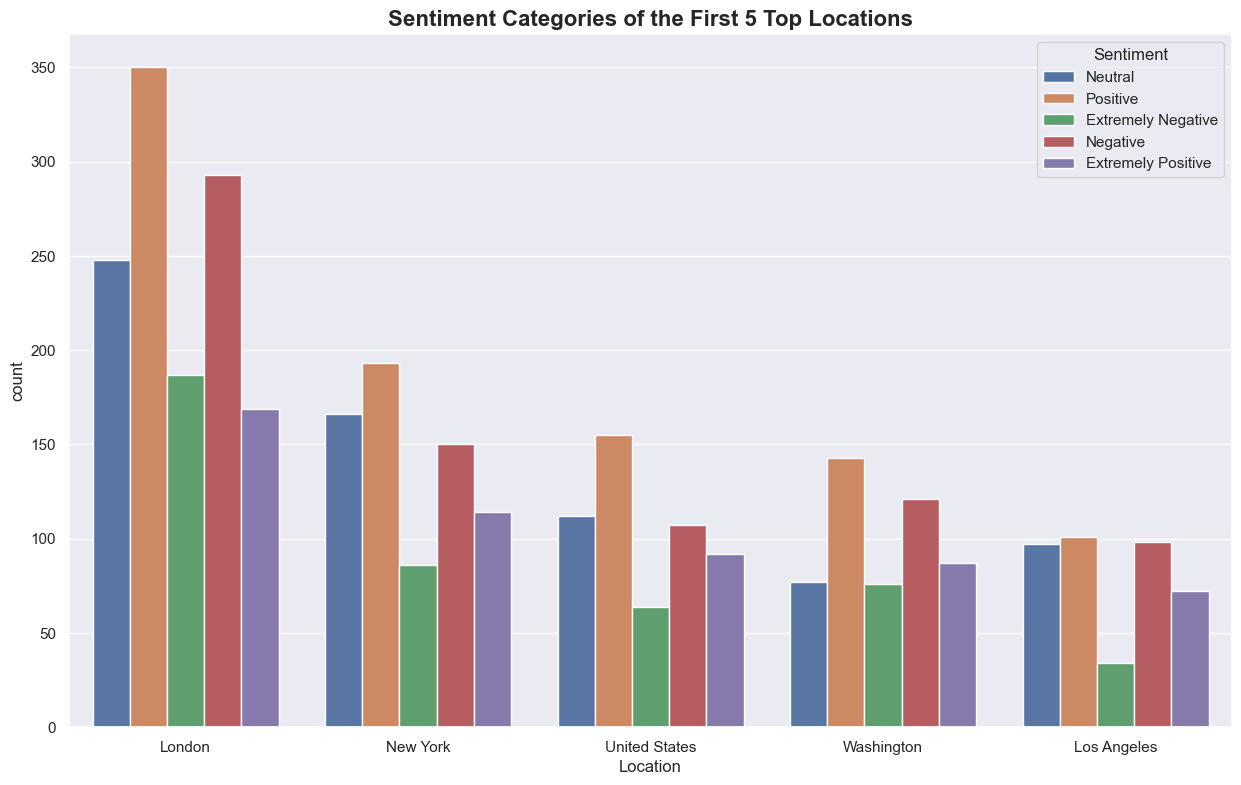

In [17]:
sns.set(rc={'figure.figsize':(15,9)})
gg = train.Location.value_counts()[:5].index
plt.title('Sentiment Categories of the First 5 Top Locations', fontsize=16, fontweight='bold')
sns.countplot(x = 'Location', hue = 'Sentiment', data = plotDf, order = gg)

In [18]:
train['Identity'] = 0
test['Identity'] = 1 
covid = pd.concat([train, test])
covid.reset_index(drop=True, inplace=True)

In [19]:
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0


In [20]:
covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Positive', 'Positive')
covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Negative', 'Negative')

In [21]:
covid = covid.drop('ScreenName', axis=1)
covid = covid.drop('UserName', axis=1)
covid

,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0
...,...,...,...,...,...
44950,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,1
44951,Farmington,16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,1
44952,Haverford,16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
44953,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Negative,1


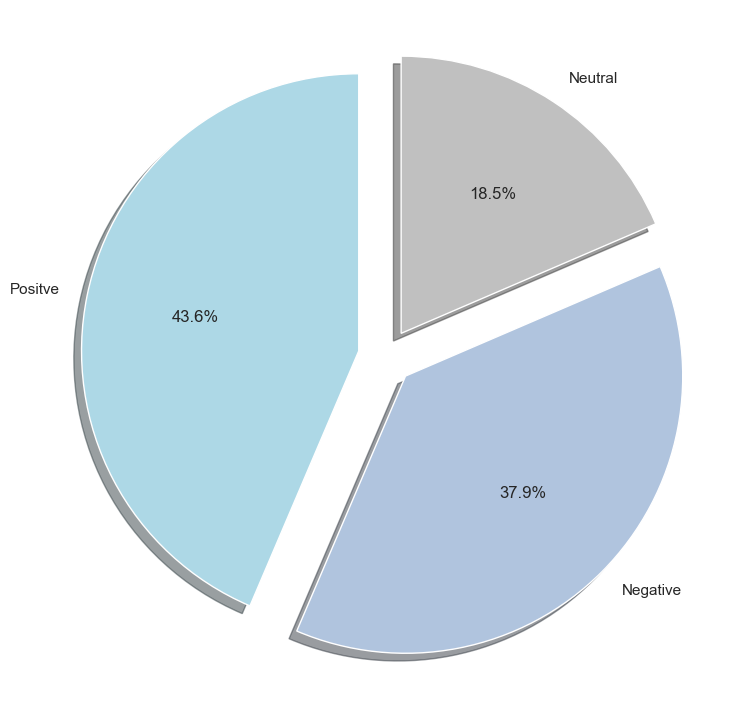

In [22]:
labels = ['Positve', 'Negative', 'Neutral']
colors = ['lightblue','lightsteelblue','silver']
explode = (0.1, 0.1, 0.1)
plt.pie(covid.Sentiment.value_counts(), colors = colors, labels=labels,
        shadow=300, autopct='%1.1f%%', startangle=90, explode = explode)
plt.show()

Text(0.5, 1.0, 'Twitted locations')

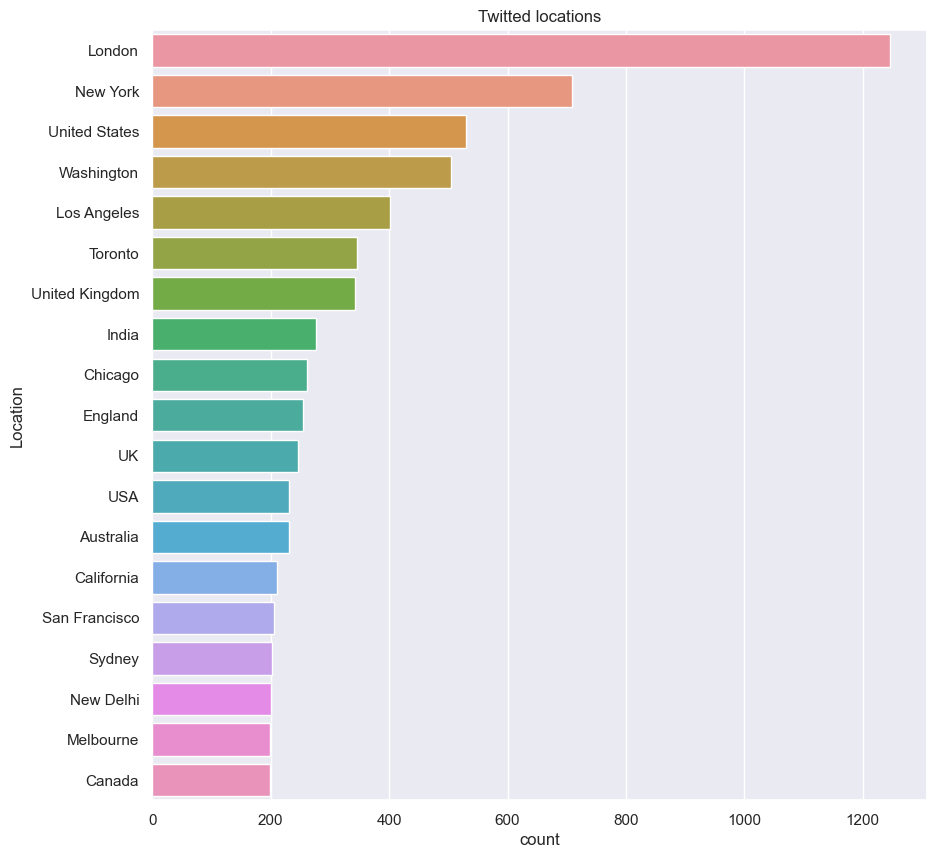

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(y='Location',data=train,order=train.Location.value_counts().iloc[
    0:19].index).set_title("Twitted locations")

In [24]:
covid['Sentiment'] = covid['Sentiment'].map({'Neutral':0, 'Positive':1, 'Negative':2})

In [25]:
hashTags=covid['OriginalTweet'].str.extractall(r"(#\S+)")
hashTags = hashTags[0].value_counts()
hashTags[:50]

#coronavirus            13345
#Covid_19                3900
#COVID19                 3470
#Coronavirus             2236
#COVID2019               1772
#toiletpaper             1376
#covid19                 1133
#COVID?19                 893
#CoronaCrisis             720
#CoronaVirus              669
#CoronavirusPandemic      626
#SocialDistancing         615
#covid_19                 477
#CoronavirusOutbreak      442
#pandemic                 410
#panicbuying              403
#CoronaVirusUpdate        341
#lockdown                 340
#Covid19                  336
#StayHomeSaveLives        334
#retail                   329
#coronavirus.             325
#StayAtHome               324
#supermarket              322
#StayHome                 312
#corona                   301
#StopHoarding             275
#socialdistancing         266
#food                     239
#COVID-19                 239
#StopPanicBuying          236
#COVID                    235
#shopping                 228
#covid19UK

In [26]:
mentions = train['OriginalTweet'].str.extractall(r"(@\S+)")
mentions = mentions[0].value_counts()
mentions[:50]

@realDonaldTrump    239
@Tesco              180
@sainsburys         152
@BorisJohnson       141
@narendramodi       110
@asda               103
@amazon              95
@PMOIndia            94
@Morrisons           87
@piersmorgan         84
@YouTube             83
@waitrose            70
@CNN                 56
@AldiUK              52
@FTC                 48
@Walmart             47
@CDCgov              44
@NYGovCuomo          42
@BBCNews             41
@SkyNews             40
@LidlGB              38
@nytimes             37
@ssupnow             37
@MailOnline          36
@WSJ                 34
@Coles               33
@McKinsey            33
@10DowningStreet     31
@kroger              31
@WHO                 30
@woolworths          30
@eBay                30
@MattHancock         28
@Target              27
@GMB                 26
@POTUS               26
@GavinNewsom         25
@NHSuk               24
@Canon_India         22
@GoogleNews          22
@Publix              22
@Ocado          

In [27]:
import re

def clean(text):
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub('r<.*?>',' ', text)
    text = text.split()
    text = " ".join([word for word in text if not word in stopWord])
    
    return text

In [32]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [28]:
import nltk
from nltk.corpus import stopwords

In [29]:
stopWord = stopwords.words('english')

In [30]:
covid['OriginalTweet'] = covid['OriginalTweet'].apply(lambda x: clean(x))

In [31]:
covid.head()

,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,London,16-03-2020,,0,0
1,UK,16-03-2020,advice Talk neighbours family exchange phone n...,1,0
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths give elderly...,1,0
3,NaN,16-03-2020,"My food stock one empty... PLEASE, panic, THER...",1,0
4,NaN,16-03-2020,"Me, ready go supermarket outbreak. Not I'm par...",2,0


In [32]:
covid = covid[['OriginalTweet','Sentiment','Identity']]
covid.head()

,OriginalTweet,Sentiment,Identity
0,,0,0
1,advice Talk neighbours family exchange phone n...,1,0
2,Coronavirus Australia: Woolworths give elderly...,1,0
3,"My food stock one empty... PLEASE, panic, THER...",1,0
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0


In [33]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [34]:
covid['Corpus'] = [nltk.word_tokenize(text) for text in covid.OriginalTweet]
lemma = nltk.WordNetLemmatizer()
covid.Corpus = covid.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
covid.Corpus = covid.apply(lambda x: " ".join(x.Corpus),axis=1)

C:\Users\RICARDO\AppData\Local\Temp\ipykernel_13844\644067402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['Corpus'] = [nltk.word_tokenize(text) for text in covid.OriginalTweet]
C:\Users\RICARDO\AppData\Local\Temp\ipykernel_13844\644067402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.Corpus = covid.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
C:\Users\RICARDO\AppData\Local\Temp\ipykernel_13844\644067402.py:4: SettingWithCopyWarning: 
A value is trying to be

In [35]:
covid.head()

,OriginalTweet,Sentiment,Identity,Corpus
0,,0,0,
1,advice Talk neighbours family exchange phone n...,1,0,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,0,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,0,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,0,"Me , ready go supermarket outbreak . Not I 'm ..."


In [36]:
train = covid[covid.Identity==0]
test = covid[covid.Identity==1]
train.drop('Identity',axis=1, inplace=True)
test.drop('Identity',axis=1, inplace=True)
test.reset_index(drop=True,inplace=True)

C:\Users\RICARDO\AppData\Local\Temp\ipykernel_13844\361648373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Identity',axis=1, inplace=True)
C:\Users\RICARDO\AppData\Local\Temp\ipykernel_13844\361648373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Identity',axis=1, inplace=True)


In [37]:
train.head()

,OriginalTweet,Sentiment,Corpus
0,,0,
1,advice Talk neighbours family exchange phone n...,1,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths give elderly...,1,Coronavirus Australia : Woolworths give elderl...
3,"My food stock one empty... PLEASE, panic, THER...",1,"My food stock one empty ... PLEASE , panic , T..."
4,"Me, ready go supermarket outbreak. Not I'm par...",2,"Me , ready go supermarket outbreak . Not I 'm ..."


In [38]:
test.head()

,OriginalTweet,Sentiment,Corpus
0,TRENDING: New Yorkers encounter empty supermar...,2,TRENDING : New Yorkers encounter empty superma...
1,"When I find hand sanitizer Fred Meyer, I turne...",1,"When I find hand sanitizer Fred Meyer , I turn..."
2,Find protect loved ones . ?,1,Find protect loved one . ?
3,buying hits City anxious shoppers stock food&a...,2,buying hit City anxious shopper stock food & a...
4,One week everyone buying baby milk powder next...,0,One week everyone buying baby milk powder next...


In [39]:
XTrain = train.Corpus
yTrain = train.Sentiment

XTest = test.Corpus
yTest = test.Sentiment

XTrain, XVal, yTrain, yVal = train_test_split(XTrain, yTrain, test_size=0.2,random_state=42)

In [40]:
XTrain.shape, XVal.shape, yTrain.shape, yVal.shape, XTest.shape, yTest.shape

((32925,), (8232,), (32925,), (8232,), (3798,), (3798,))

In [41]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=5).fit(covid.Corpus)

XTrainVec = vectorizer.transform(XTrain)
XValVec = vectorizer.transform(XVal)
XTestVec = vectorizer.transform(XTest)

In [42]:
logReg = LogisticRegression(random_state=42)

In [43]:
cross_val_score(LogisticRegression(random_state=42),
                XTrainVec, yTrain, cv=10, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   11.8s finished


0.798572803830357

In [44]:
model = logReg.fit(XTrainVec, yTrain)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(classification_report(yVal, model.predict(XValVec)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1553
           1       0.83      0.84      0.83      3617
           2       0.82      0.79      0.80      3062

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.78      8232
weighted avg       0.80      0.80      0.80      8232



In [46]:
penalty = ['l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

logRegGrid = GridSearchCV(logReg, hyperparameters, cv=5, verbose=0)

In [47]:
bestModel = logRegGrid.fit(XTrainVec, yTrain)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [48]:
print('Best Penalty:', bestModel.best_estimator_.get_params()['penalty'])
print('Best C:', bestModel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [49]:
yPred = bestModel.predict(XTestVec)

In [50]:
print(classification_report(yTest, bestModel.predict(XTestVec)))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       619
           1       0.78      0.81      0.79      1546
           2       0.80      0.78      0.79      1633

    accuracy                           0.77      3798
   macro avg       0.75      0.75      0.75      3798
weighted avg       0.77      0.77      0.77      3798



In [63]:
#pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 4.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 440.7/440.7 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 876.9 kB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     -------------------------------

In [64]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [65]:
lines = []
for line in train['Corpus']:
    lines.append(line)
    
len(lines)

41157

In [66]:
tokenizer = Tokenizer(num_words=5000, lower=True) # Number of words to consider as features
tokenizer.fit_on_texts(train['Corpus'].values)
wordIndex = len(tokenizer.word_index) + 1
print('Found %s unique tokens.' % (wordIndex))

Found 33387 unique tokens.


In [67]:
XTrain = tokenizer.texts_to_sequences(train['Corpus'].values)
XTrain = pad_sequences(XTrain, maxlen=30) # Cuts off the texts after this number of words

XTest = tokenizer.texts_to_sequences(test['Corpus'].values)
XTest = pad_sequences(XTest, maxlen=30)

In [68]:
XTrain.shape, XTest.shape

((41157, 30), (3798, 30))

In [69]:
yTrain = to_categorical(train['Sentiment'], 3)
yTest = to_categorical(test['Sentiment'], 3)

In [70]:
model= models.Sequential()
model.add(layers.Embedding(wordIndex, 128, input_length=1000))
model.add(layers.LSTM(200))
model.add(Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         4273536   
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 3)                 603       
                                                                 
Total params: 4,537,339
Trainable params: 4,537,339
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [97]:
history = model.fit(XTrain ,yTrain, batch_size=250, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/100


ValueError: in user code:

    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1000), found shape=(None, 30)


In [98]:
import tensorflow as tf

In [105]:
# Obtén la longitud máxima de las secuencias
max_length = max(len(seq) for seq in XTrain)
input_dim = XTrain.shape[1]
# Rellena las secuencias con ceros para que tengan la misma longitud
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(XTrain, maxlen=max_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(XTest, maxlen=max_length)

# Definición de la arquitectura BI-LSTM con una capa de relleno
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=0.0, input_shape=(max_length, input_dim)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Capas adicionales según sea necesario
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Resto del código: compilación, entrenamiento y evaluación del modelo

In [106]:
# Definición de la arquitectura BI-LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Capas adicionales según sea necesario
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [107]:
# Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
# Entrenamiento del modelo
model.fit(XTrain, yTrain, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "bidirectional_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 30)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 30), dtype=int32)
      • training=True
      • mask=None
